<a href="https://colab.research.google.com/github/Pedro69491/ML-Algorithms/blob/main/Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

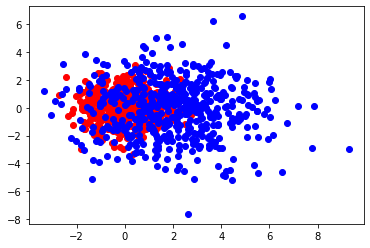

In [3]:
c1 = np.random.multivariate_normal((0,0),np.array([[1,0], [0,1]]), 500)
c2 = np.random.multivariate_normal((2,0), np.dot(4,np.array([[1,0], [0,1]])), 500)



plt.scatter(c1[:,0], c1[:,1], c='red')
plt.scatter(c2[:,0], c2[:,1], c='blue')
plt.show()

data = np.vstack((c1,c2))

In [4]:
#dic = {str(data[i]):(-1 if i<500 else 1) for i in range(len(data))}

x_train = np.array([i for i in data[0:1000:2]])
x_test = np.array([i for i in data[1:1000:2]])

t_train = np.zeros((len(x_train)))
t_test = np.zeros((len(x_test)))

t_train[250:500] = 1
t_test[250:500] = 1


t_train = np.eye(2)[t_train.astype(int)]
t_test = np.eye(2)[t_test.astype(int)]

In [5]:
a = tf.constant([[1.0,2.0],[1.0,3.0],[1.0,4.0]])
res = tf.nn.softmax(a)
print(res.eval(session=tf.compat.v1.Session()))

print(tf.argmax(res,1).eval(session=tf.compat.v1.Session()))

print(tf.cast([True, False], dtype=tf.float32).eval(session=tf.compat.v1.Session()))

[[0.26894143 0.7310586 ]
 [0.11920291 0.880797  ]
 [0.04742587 0.95257413]]
[1 1 1]
[1. 0.]


In [6]:
x = tf.placeholder(tf.float32, [None, 2])
t = tf.placeholder(tf.float32, [None, 2])

#Optimization Parameters
learning_rate = tf.placeholder(tf.float32)
momentum = tf.placeholder(tf.float32)
n_epochs = 10000

#Model parameters
W1 = tf.get_variable('W1', [2,2], initializer=tf.random_normal_initializer)
b1 = tf.get_variable('B1',[2], initializer=tf.random_normal_initializer)
W2 = tf.get_variable('W2', [2,2], initializer=tf.random_normal_initializer)
b2 = tf.get_variable('B2', [2], initializer=tf.random_normal_initializer)


#Construct model
a1 = tf.matmul(x, W1) + b1
#tanh highligths negative values, adding more quality to the classification process
z1 = tf.tanh(a1)
a2 = tf.matmul(z1, W2) + b2
y = tf.nn.sigmoid(a2)

prediction = tf.argmax(y, 1)
#tf.equal Returns the truth value of (x == y) element-wise.
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, tf.argmax(t, 1)), tf.float32))

loss_test = tf.compat.v1.losses.mean_squared_error(labels=t, predictions=y)

print(loss_test)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=t, logits=a2))
optimizer = tf.train.MomentumOptimizer(learning_rate =learning_rate, momentum=momentum).minimize(loss)
#Initialize the variables
init = tf.global_variables_initializer()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Tensor("mean_squared_error/value:0", shape=(), dtype=float32)


In [8]:
#Start a new session 
total_accuracy = 0
accum_error = 0
for i in range(10):
    with tf.Session() as session:
      #initialize the values
      session.run(init)
      print('expert {}'.format(i+1))
      #training cycle
      for epoch in range(n_epochs):
        _, error = session.run([optimizer, loss], feed_dict={x: x_train, t: t_train, learning_rate: 0.1, momentum: 0.5})

        if epoch%1000 == 0:
          print("Epoch: {}, loss: {}".format(epoch, error))
      expert_error = session.run(loss_test, feed_dict={x: x_test, t: t_test})
      accuracy_value = session.run(accuracy, feed_dict={x: x_test, t: t_test})
      print("Accuracy:", accuracy_value)
      print("error:", expert_error)
      total_accuracy += accuracy_value
      accum_error += expert_error
    print('Optimization done')

print('Normalized Accuracy: ', total_accuracy/10)
print("Normalized error:", accum_error/10)

expert 1
Epoch: 0, loss: 1.0838464498519897
Epoch: 1000, loss: 0.4229671359062195
Epoch: 2000, loss: 0.39737096428871155
Epoch: 3000, loss: 0.39417070150375366
Epoch: 4000, loss: 0.39278697967529297
Epoch: 5000, loss: 0.39198553562164307
Epoch: 6000, loss: 0.39146438241004944
Epoch: 7000, loss: 0.39110076427459717
Epoch: 8000, loss: 0.3908333480358124
Epoch: 9000, loss: 0.39062848687171936
Accuracy: 0.784
error: 0.15494339
Optimization done
expert 2
Epoch: 0, loss: 0.9973272681236267
Epoch: 1000, loss: 0.4413972795009613
Epoch: 2000, loss: 0.4165151119232178
Epoch: 3000, loss: 0.39598962664604187
Epoch: 4000, loss: 0.3933197259902954
Epoch: 5000, loss: 0.39227187633514404
Epoch: 6000, loss: 0.3916473984718323
Epoch: 7000, loss: 0.3912279009819031
Epoch: 8000, loss: 0.3909268081188202
Epoch: 9000, loss: 0.39070022106170654
Accuracy: 0.782
error: 0.15496543
Optimization done
expert 3
Epoch: 0, loss: 1.1950651407241821
Epoch: 1000, loss: 0.4428689181804657
Epoch: 2000, loss: 0.43874523043